# VGG network

### Import needed libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import concatenate
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


from keras.models import Model
from keras.layers import Input, Dense

from keras.models import load_model
import tensorflow as tf

from keras.applications import resnet50

from pathlib import Path

import matplotlib.pyplot as plt

import load_data

### Create variables to save net weights and loss and accuracy images

In [2]:
weights_path = './weights_2.h5'
loss_img_name = 'loss_2.png'
accuracy_img_name = 'accuracy_2.png'

### File with the parameters of the network

In [3]:
weights_file = Path(weights_path)

### Fix random seed for reproducibility

In [4]:
seed = 7
np.random.seed(seed)

### Don't be greedy on GPU RAM

In [5]:
config = tf.compat.v1.ConfigProto()
## ask for GPU memory gracefully
config.gpu_options.allow_growth = True

sess = tf.compat.v1.Session(config=config)

tf.compat.v1.keras.backend.set_session(sess)

### Load data and prepare it for the training process

In [39]:
#data_path = "./cifar_10/"

num_img_train = 10000 # Max_value= 50000

(X_train, y_train), (X_test, y_test) = load_data.load_data(num_img_train)

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print("num_training_samples: ", X_train.shape)

cifar10
num_training_samples:  (10000, 32, 32, 3)


### Create network model

In [40]:
#  dropout rate for FC layers
dropout=0.5

# CNN architecture

input_image = Input(shape=(32,32,3))
x1 = Conv2D(64, (3, 3),padding='same', activation='relu')(input_image)
x1 = Conv2D(64, (3, 3),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)

#Code added
x1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(128, (3, 3),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)

x1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(256, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(256, (1, 1),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)

x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (1, 1),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)

x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (3, 3),padding='same', activation='relu')(x1)
x1 = Conv2D(512, (1, 1),padding='same', activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
#End code added

x1 = Flatten()(x1)

#Modified/added code
x=Dense(4096, activation='relu', kernel_constraint=maxnorm(3))(x1)
x=Dense(4096, activation='relu', kernel_constraint=maxnorm(3))(x)
#End modified/added code

x=Dropout(dropout)(x)

out= Dense(num_classes, activation='softmax')(x)

model = Model(inputs = input_image, outputs = out);

#Load parameters
if weights_file.is_file():
	model.load_weights(weights_path)

### Initialize training parameters

In [41]:
epochs = 20
lrate = 0.001
decay = 0
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)        

### Fit the model

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/20
157/157 [==============================] - 4649s 30s/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
157/157 [==============================] - 3077s 20s/step - loss: 2.3025 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
157/157 [==============================] - 2355s 15s/step - loss: 2.3024 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
157/157 [==============================] - 2466s 16s/step - loss: 2.3022 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
157/157 [==============================] - 2441s 16s/step - loss: 2.3022 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
157/157 [==============================] - 3479s 22s/step - loss: 2.3021 - accuracy: 0.1033 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
157/157 [==============================] - 2955s 19s/step - loss: 2.3020 - accuracy: 0.1020 - val_loss: 2.3026 - val_ac

### Final evaluation of the model

In [43]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 17.37%


### Plot history for accuracy for training and testing process

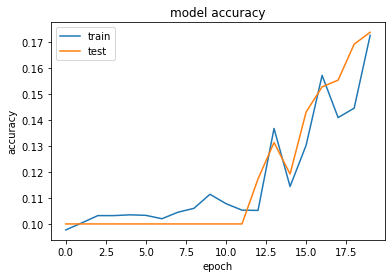

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Save the figure
plt.savefig(accuracy_img_name)

# Show figure
plt.show()

### Plot history for loss for training and testing process

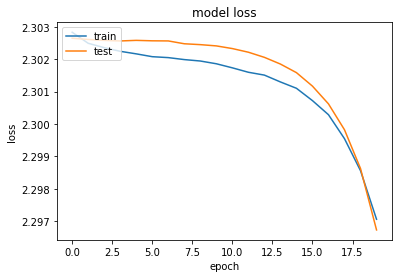

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Save the figure
plt.savefig(loss_img_name)

# Show figure
plt.show()

### Save the weights to a file

In [46]:
model.save_weights(weights_path)